imports

In [1]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')


Init Variables

In [14]:
data_file= './Data'


In [15]:
train_data_dir =data_file
batch_size = 32
target_size = (224, 224)
validation_split = 0.2

train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=44,
    image_size=target_size,
    batch_size=batch_size,
)



Found 3096 files belonging to 4 classes.
Using 2477 files for training.
Found 3096 files belonging to 4 classes.
Using 619 files for validation.


In [16]:
class_names = train.class_names

In [ ]:
#input_shape=(224,224,3),include_top=False,weights='imagenet'
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(4,activation=tf.nn.softmax))
model.summary()

In [ ]:
checkpoint_cb =ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=model.fit_generator(train,epochs=20,validation_data=validation,callbacks=[checkpoint_cb,early_stopping_cb])

In [ ]:
model.save("brain_tumors.keras")

In [2]:
model = tf.keras.models.load_model("brain_tumors.keras")

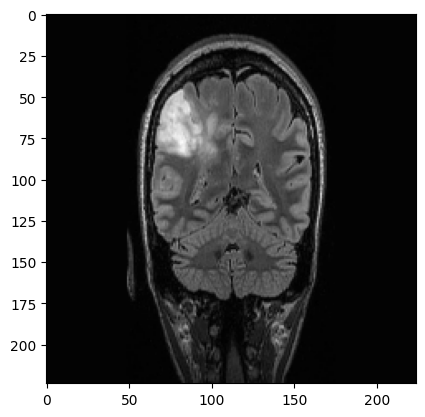

In [18]:
import cv2
import matplotlib.pyplot as plt
img  = cv2.imread('./test.jpg')
img = cv2.resize(img,(224,224))

plt.imshow(img)

In [19]:
prediction = model.predict(img.reshape(1,224,224,3))

prediction = prediction.argmax()

print(class_names[prediction])

1/1 [==============================] - 0s 42ms/step
meningioma_tumor
